In [1]:
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers

In [2]:
(train_data, train_labels), (test_data, test_label) = imdb.load_data(num_words = 10000)  
# num_words=10000意思是保留训练数据中前10000个最常出现的单词

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()  # word_index是一个将单词映射为整数索引的字典
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])  # 键值颠倒，将整数索引映射为单词
decoded_review = ''.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])  # 将评论解码，索引减去3是因为前三个时保留索引

In [7]:
import numpy as np

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.    # 将results[i]的指定索引设为1
    return results

x_train = vectorize_sequences(train_data)  # 将训练数据向量化
x_test = vectorize_sequences(test_data)  # 将测试数据向量化

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 115ms/step - loss: 0.5261 - acc: 0.7823 - val_loss: 0.3849 - val_acc: 0.8725
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3029 - acc: 0.9023 - val_loss: 0.2995 - val_acc: 0.8891
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2186 - acc: 0.9267 - val_loss: 0.2803 - val_acc: 0.8895
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1710 - acc: 0.9420 - val_loss: 0.3058 - val_acc: 0.8767
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1424 - acc: 0.9533 - val_loss: 0.2834 - val_acc: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1170 - acc: 0.9651 - val_loss: 0.2986 - val_acc: 0.8837
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0944 - acc: 0.9718 - val_loss: 0.3153 - val_acc: 0.8828
Epoch 8/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0782 - 

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [ ]:
import matplotlib.pyplot as plt

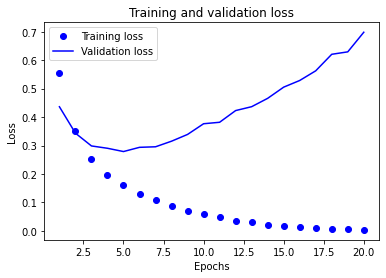

In [19]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

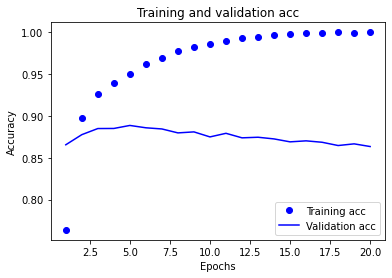

In [20]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history1 = model.fit(partial_x_train,
           partial_y_train,
           epochs=4,
           batch_size=512,
           validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
30/30 [==============================] - 4s 138ms/step - loss: 0.0052 - acc: 0.9987 - val_loss: 0.8065 - val_acc: 0.8661
Epoch 2/4
30/30 [==============================] - 1s 25ms/step - loss: 8.8684e-04 - acc: 0.9999 - val_loss: 0.8377 - val_acc: 0.8631
Epoch 3/4
30/30 [==============================] - 1s 28ms/step - loss: 0.0026 - acc: 0.9994 - val_loss: 0.8646 - val_acc: 0.8636
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.9832 - acc: 0.8493
[0.9832186698913574, 0.8493199944496155]


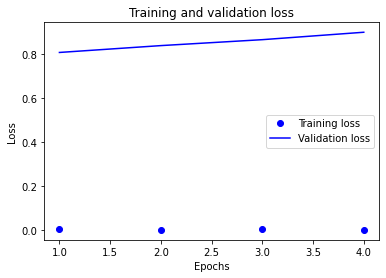

In [26]:
history_dict = history1.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

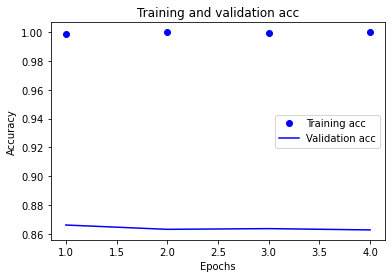

In [27]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()